In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loading_columns=['ID', 'Severity', 'Start_Time', 'End_Time','Start_Lat', 'Start_Lng', 'City', 'County', 'State', 'Timezone']
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_June20.csv', usecols=loading_columns)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Timezone
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,Dayton,Montgomery,OH,US/Eastern
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Reynoldsburg,Franklin,OH,US/Eastern
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,Williamsburg,Clermont,OH,US/Eastern
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,Dayton,Montgomery,OH,US/Eastern
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,Dayton,Montgomery,OH,US/Eastern


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


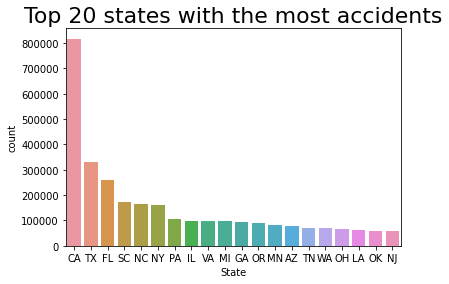

In [ ]:
# Visualiza top 20 states with the most accidents 
sns.countplot(df['State'], order=df['State'].value_counts().iloc[:20].index)
plt.title("Top 20 states with the most accidents", fontsize=22)
plt.show()

In [ ]:
loading_columns=['ID', 'Severity', 'Start_Time', 'End_Time','Start_Lat', 'Start_Lng', 'City', 'County', 'State', 'Timezone']
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_June20.csv', usecols=loading_columns)
df2 = df.loc[df['State'] == 'CA']
df2 = df2.reset_index(drop=True)
df2.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Timezone
0,A-729,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,Vallejo,Solano,CA,US/Pacific
1,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,Hayward,Alameda,CA,US/Pacific
2,A-731,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,Walnut Creek,Contra Costa,CA,US/Pacific
3,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,Cupertino,Santa Clara,CA,US/Pacific
4,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,San Jose,Santa Clara,CA,US/Pacific


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


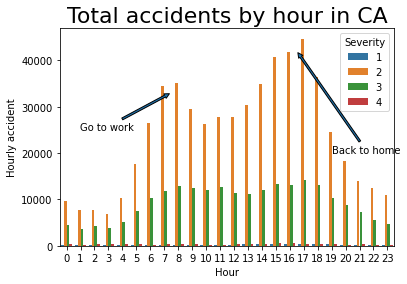

In [ ]:
#convert the datetime
df2['Start_Time'] = pd.to_datetime(df2['Start_Time'])
df2['End_Time']=pd.to_datetime(df2['End_Time'])

# plot the severity with the accident time
sns.countplot(df2['Start_Time'].dt.hour, hue = df2['Severity'])
plt.title("Total accidents by hour in CA", fontsize=22)
plt.xlabel('Hour')
plt.ylabel('Hourly accident')
plt.annotate('Go to work', xy=(7.5,33000), xytext=(1,25000),arrowprops={'arrowstyle':'simple'})
plt.annotate('Back to home', xy=(16.5,42000), xytext=(19,20000),arrowprops={'arrowstyle':'simple'})
plt.show()
#There are two peaks during a single day, which represent the people's commute.
#Most of the traffic accidents are in severity 2

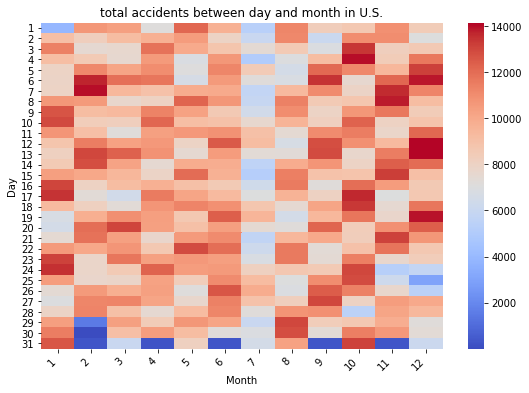

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time']=pd.to_datetime(df['End_Time'])
map = pd.crosstab(df['Start_Time'].dt.day, df['End_Time'].dt.month)
f, ax = plt.subplots(figsize=(9, 6))
# Draw the heatmap of total accidents between day and month
sns.heatmap(map, fmt="d",cmap='coolwarm', ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.title('total accidents between day and month in U.S.')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()

In [ ]:
import folium

area_counties = ['Los Angeles']
CA=df[df["State"] == 'CA']
area=CA[CA['County'].isin(area_counties)]
area['Start_Time'] = pd.to_datetime(area['Start_Time'])

area['roundlat'] = area['Start_Lat'].round(3)
area['roundlon'] = area['Start_Lng'].round(3)
hotspot_area = area.groupby(['roundlat', 'roundlon'])['ID'].count().sort_values(ascending=False).reset_index()[:20]
hotspot_area.columns = ['lat','lon','count']

m = folium.Map(location = [33.94, -118.09], zoom_start=10,)

for lat, lng, size, in zip(hotspot_area.lat, hotspot_area.lon, hotspot_area['count']):
    folium.CircleMarker(
        location=[lat, lng],
        radius=size/40,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.4
    ).add_to(m)

m


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
center = pd.DataFrame(columns = ['roundlat','roundlon'])
center['lat']=[34.03, 33.93, 34.05, 34.04]
center['lon']=[-117.98, -118.12, -118.45, -118.27]

for lat, lng, in zip(center.lat, center.lon):
    folium.CircleMarker(
        location=[lat, lng],
        radius=8,
        color='white',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4
    ).add_to(m)

m